In [49]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv('song_dataset.csv')


In [51]:
df = df.drop_duplicates()

In [52]:
df.shape

(101572, 7)

In [53]:
users = df['user'].unique()
songs = df['song'].unique()

newuserIds = {o:i for i,o in enumerate(users)}
df['user'] = df['user'].apply(lambda x: newuserIds[x])
newSongsId = {o:i for i,o in enumerate(songs)}
df['song'] = df['song'].apply(lambda x: newSongsId[x])

In [54]:
df.isnull().sum()

user           0
song           0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

In [55]:
df_unique_songs = df.drop_duplicates(subset=['song']).reset_index(drop=True)[['song', 'title']]
df_unique_songs

,song,title
0,0,The Cove
1,1,Nothing from Nothing
2,2,Entre Dos Aguas
3,3,Under Cold Blue Stars
4,4,Riot Radio (Soundtrack Version)
...,...,...
44453,44453,Mother Mother [Live] (Album Version)
44454,44454,Hook Me Up [Tommy Trash Remix]
44455,44455,Marrakech Dub
44456,44456,Popland


In [83]:
df_unique_artist = df.drop_duplicates(subset=['artist_name']).reset_index(drop=True)[['artist_name']]
df_unique_artist.shape

df_unique_users = df.drop_duplicates(subset=['user']).reset_index(drop=True)[['user']]
df_unique_users.shape

(2042, 1)

In [57]:
popularSongs = df.groupby('song')['play_count'].count().reset_index().sort_values(['play_count', 'song'], ascending = [0,1])
popularSongs

,song,play_count
22,22,221
224,224,214
199,199,197
200,200,190
218,218,178
...,...,...
44453,44453,1
44454,44454,1
44455,44455,1
44456,44456,1


In [58]:
popularArtist = df.groupby('artist_name')['play_count'].count().reset_index().sort_values(['play_count', 'artist_name'], ascending = [0,1])
popularArtist

,artist_name,play_count
2150,Coldplay,904
10056,The Black Keys,689
5686,Kings Of Leon,679
3288,Eminem,550
3676,Florence + The Machine,496
...,...,...
11913,polarkreis 18,1
11916,sleeparchive,1
11917,snoop Dogg Featuring The Dramatics_ Lil' Half ...,1
11923,yoomiii,1


In [59]:
test = df.loc[df['year'] == 0]

In [60]:
test

,user,song,play_count,title,release,artist_name,year
0,0,0,1,The Cove,Thicker Than Water,Jack Johnson,0
4,0,4,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0
5,0,5,1,Sin límites (I),Amset,Amset,0
23,0,22,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
25,0,24,1,Silvery Sleds (Album Version),Nick & Norah's Infinite Playlist - Original Mo...,Army Navy,0
...,...,...,...,...,...,...,...
102599,2040,44452,1,Boom (Live At Cornerstone),The Warriors EP_ Vol. 2,P.O.D.,0
102602,2040,17937,1,Backdoor Love Affair (LP Version),The ZZ Top Six Pack,ZZ Top,0
102615,2041,44457,16,Three Pope (feat. Monty Alexander),Order of Distinction,Ernie Ranglin,0
102616,2041,206,18,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0


In [61]:
df.loc[df['release'] == 'Thicker Than Water']['year'].unique()

array([   0, 2003])

In [62]:
noZeros = df[df.year != 0]
noZeros = noZeros.drop_duplicates(subset=['release']).reset_index(drop=True)
noZeros = noZeros[['release','year']]
noZeros

,release,year
0,To Die For,1974
1,Flamenco Para Niños,1976
2,Under Cold Blue Stars,2002
3,10 + Downloaded,2006
4,Sounds Like This,2008
...,...,...
15440,Frontier,2008
15441,The Geist Of Alec Empire,1994
15442,Sub.mersion,2009
15443,Cocoon,2001


In [63]:
releaseDict = noZeros.set_index('release')['year'].to_dict()
releaseDict

{'To Die For': 1974,
 'Flamenco Para Niños': 1976,
 'Under Cold Blue Stars': 2002,
 '10 + Downloaded': 2006,
 'Sounds Like This': 2008,
 'Graduation': 2007,
 'In Between Dreams': 2005,
 'The Garden': 2006,
 'There Is Nothing Left To Lose': 1999,
 'Antología Audiovisual': 2007,
 'The Fame Monster': 2008,
 'En Mana Kuoyo': 1993,
 'The Best Of': 1989,
 'Nashville': 2005,
 'The Best Of The Rykodisc Years': 2004,
 'Country Mouse_ City House': 2007,
 'Hôtel Costes 7 by Stéphane Pompougnac': 2002,
 'If I Had Eyes': 2007,
 'Original Hits - Rock': 1989,
 'Greatest Hits': 1989,
 'Futures': 2006,
 'Incredibad': 2009,
 'We Feel Safer At Night': 2006,
 "Let's Have A Rock 'N' Roll Party - 36 Rockin' Greats": 1959,
 'I Am The Cosmos': 1992,
 'Murmur - Deluxe Edition': 1983,
 'Fleet Foxes': 2008,
 'Llueve': 1998,
 'White Trash Christmas': 2002,
 'Sun Giant': 2008,
 'En Concert': 2009,
 'The Broken String': 2007,
 'Noble Beast': 2009,
 'A Book Like This': 2007,
 'Superhero Brother': 2008,
 'Live in Mal

In [64]:
dfnew = pd.merge(df, noZeros, how='outer', on='release')
dfnew

,user,song,play_count,title,release,artist_name,year_x,year_y
0,0,0,1,The Cove,Thicker Than Water,Jack Johnson,0,2003.0
1,0,99,8,Moonshine,Thicker Than Water,Jack Johnson,2003,2003.0
2,0,102,1,Holes To Heaven,Thicker Than Water,Jack Johnson,2003,2003.0
3,355,99,3,Moonshine,Thicker Than Water,Jack Johnson,2003,2003.0
4,726,0,1,The Cove,Thicker Than Water,Jack Johnson,0,2003.0
...,...,...,...,...,...,...,...,...
101567,2040,44435,1,Morpheus,Superdiscount 2,Etienne De Crécy,0,NaN
101568,2040,44437,1,Noble Art (Feat Methodman & Redman - Instrumen...,Anthologie IAM 2008,Iam,0,NaN
101569,2040,44447,1,ENGELS NACHTEGALTJE,The Flutish Kingdom,PUNDER_ NEEME,0,NaN
101570,2040,44454,1,Hook Me Up [Tommy Trash Remix],Untouched,The Veronicas,2007,2007.0


In [65]:
test2 = dfnew[dfnew['year_y'].isna()]

In [66]:
test2

,user,song,play_count,title,release,artist_name,year_x,year_y
59,0,4,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0,NaN
60,0,24,1,Silvery Sleds (Album Version),Nick & Norah's Infinite Playlist - Original Mo...,Army Navy,0,NaN
61,0,5,1,Sin límites (I),Amset,Amset,0,NaN
695,0,22,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0,NaN
696,6,22,3,Sehr kosmisch,Musik von Harmonia,Harmonia,0,NaN
...,...,...,...,...,...,...,...,...
101565,2040,44423,1,Du Rire Aux Larmes,Du Rire Aux Larmes,Sniper,0,NaN
101567,2040,44435,1,Morpheus,Superdiscount 2,Etienne De Crécy,0,NaN
101568,2040,44437,1,Noble Art (Feat Methodman & Redman - Instrumen...,Anthologie IAM 2008,Iam,0,NaN
101569,2040,44447,1,ENGELS NACHTEGALTJE,The Flutish Kingdom,PUNDER_ NEEME,0,NaN


In [67]:
df.loc[df['release'] == 'Amset']['year']

5    0
Name: year, dtype: int64

In [68]:
df = df.drop('year', axis=1)
df

,user,song,play_count,title,release,artist_name
0,0,0,1,The Cove,Thicker Than Water,Jack Johnson
1,0,1,1,Nothing from Nothing,To Die For,Billy Preston
2,0,2,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia
3,0,3,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse
4,0,4,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s
...,...,...,...,...,...,...
102622,2041,23076,3,87,Hopeless Romantic,Bouncing Souls
102623,2041,14378,4,Space Olympics,Incredibad,The Lonely Island
102624,2041,1759,8,I'm On A Boat,Incredibad,The Lonely Island / T-Pain
102625,2041,319,3,Amityville,The Marshall Mathers LP,Eminem / Bizarre


In [69]:
grouped_songs = df[["title", "play_count"]].groupby(["title"]).agg({"play_count" : "sum"})
grouped_songs= grouped_songs.reset_index()
grouped_songs = grouped_songs.sort_values(['play_count'], ascending = False)
grouped_songs = grouped_songs[:15]

labels = grouped_songs['title'].tolist()
counts = grouped_songs['play_count'].tolist()

/var/folders/tz/s2b4p7g52r147kj88xbk0ts80000gn/T/ipykernel_652/968454624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='Set3')


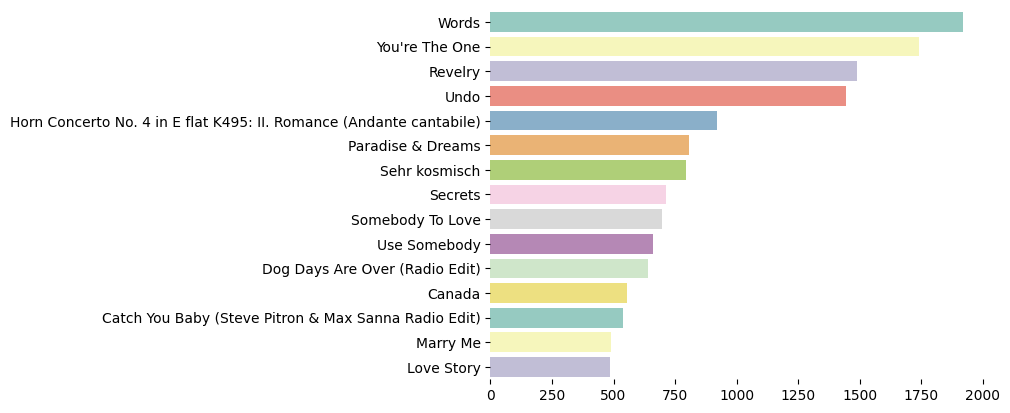

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

In [71]:
grouped_artists = df[["artist_name", "play_count"]].groupby(["artist_name"]).agg({"play_count" : "sum"})
grouped_artists= grouped_artists.reset_index()
grouped_artists = grouped_artists.sort_values(['play_count'], ascending = False)
grouped_artists = grouped_artists[:15]

labels = grouped_artists['artist_name'].tolist()
counts = grouped_artists['play_count'].tolist()

/var/folders/tz/s2b4p7g52r147kj88xbk0ts80000gn/T/ipykernel_652/968454624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='Set3')


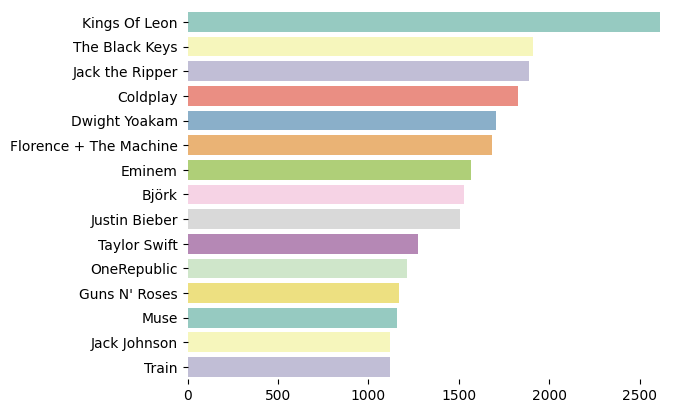

In [72]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

In [75]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import joblib

df = df.drop_duplicates(['user', 'song'])
df_pivot = df.pivot(index = 'song', columns = 'user', values = 'play_count').fillna(0)
df_mat = csr_matrix(df_pivot.values)

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

# Fit the NearestNeighbors model with your data
model_knn.fit(df_mat)

# Save the fitted model
model_path = 'nearest_neighbors_model.joblib'
joblib.dump(model_knn, model_path)

# Load the saved model
model_path = 'nearest_neighbors_model.joblib'
loaded_model = joblib.load(model_path)

# Use the loaded model for predictions
# Ensure to use 'fit' before calling 'kneighbors'
loaded_model.fit(df_mat)

NearestNeighbors(algorithm='brute', metric='cosine')

In [76]:
song_names = df.set_index('song')['title'].to_dict()

In [77]:
df_unique_songsDict = df_unique_songs.set_index('title')['song'].to_dict()
df_unique_songsDict['Sehr kosmisch']

22

In [78]:
def findSongsUser(user):
    songsReco = []
    users_songs = df.loc[df['user'] == user]['title'].values
    return findSongsList(users_songs)

In [79]:
def most_frequent(List):
    counter = 0
    num = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

In [80]:
def remove_common(a, b):
    a = [i for i in a if i not in b]
    
    return a

In [81]:
import random
def findSongsList(songs):
    songsReco = []
    for song in songs:
        query_index = df_unique_songsDict[song]
        distances, indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors=10)
        for i in range(1, len(distances.flatten())):
            songsReco.append(song_names[df_pivot.index[indices.flatten()[i]]])
                
    #print("--------------" + most_frequent(songsReco))
    new = remove_common(songsReco, songs)
    #print("--------------" + most_frequent(new))
    mostFreq = most_frequent(new)
    recos = random.sample(new, len(new))[:5]
    if not mostFreq:
        return recos
    else:
        recos.append(mostFreq)
        return recos

In [82]:
findSongsUser(0)

['Between The Lines',
 'Johnny',
 'I Write The Songs',
 'Slave machinery',
 "There's A Light (LP Version)",
 'I Feel Fantastic']

In [ ]:
songList = ['Tragedy Of War (In III Parts)',
 'Rasool',
 'Pie Jesu',
 "Yes_ I Don't Want This",
 'Waking Up In Vegas (Calvin Harris Remix Edit)',
 'The Biggest Lie I Ever Told']
findSongsList(songList)